In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [3]:
# Import datasets
data = pd.read_csv('os.csv')
data.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [4]:
df = pd.DataFrame(data)

In [5]:
#drop unnecessary columns 
columns_to_drop = ['Unnamed: 0', 'CustomerID', 'Transaction_ID', 'Product_Description', 'Coupon_Code','Product_SKU']
df.drop(columns=columns_to_drop, inplace=True)
rows = df.shape[0] # Get number of rows
columns = df.shape[1] # Get number of columns
print(rows, columns)

52955 15


In [6]:
df.describe()

,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26.127995,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,13.478285,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,2.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,15.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,27.000000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,37.000000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,50.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            52924 non-null  object 
 1   Location          52924 non-null  object 
 2   Tenure_Months     52924 non-null  float64
 3   Transaction_Date  52924 non-null  object 
 4   Product_Category  52955 non-null  object 
 5   Quantity          52924 non-null  float64
 6   Avg_Price         52924 non-null  float64
 7   Delivery_Charges  52924 non-null  float64
 8   Coupon_Status     52924 non-null  object 
 9   GST               52924 non-null  float64
 10  Date              52924 non-null  object 
 11  Offline_Spend     52924 non-null  float64
 12  Online_Spend      52924 non-null  float64
 13  Month             52955 non-null  int64  
 14  Discount_pct      52555 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.1+ MB


In [8]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)
print(data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (52955, 21)
Unnamed: 0               int64
CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Date                    object
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
dtype: object


Draw out month graph, against offline and online spend see which month has more online to offline spend

# The conclusion we want to talk about?

In [9]:
offline = pd.DataFrame(data['Offline_Spend'])
online = pd.DataFrame(data['Online_Spend'])
mnth=pd.DataFrame(data['Month'])
spendings = pd.concat([offline, online], axis=1)
spendings
#mnth=mnth.value_counts().sort_index()

,Offline_Spend,Online_Spend
0,4500.0,2424.5
1,4500.0,2424.5
2,4500.0,2424.5
3,4500.0,2424.5
4,4500.0,2424.5
...,...,...
52950,NaN,NaN
52951,NaN,NaN
52952,NaN,NaN
52953,NaN,NaN


In [10]:
#Drop empty columns
spendings.dropna(axis=0)

,Offline_Spend,Online_Spend
0,4500.0,2424.50
1,4500.0,2424.50
2,4500.0,2424.50
3,4500.0,2424.50
4,4500.0,2424.50
...,...,...
52919,2500.0,1294.22
52920,2000.0,1066.12
52921,3000.0,2230.76
52922,3000.0,2230.76


In [11]:
spendings.describe()

,Offline_Spend,Online_Spend
count,52924.000000,52924.000000
mean,2830.914141,1893.109119
std,936.154247,807.014092
min,500.000000,320.250000
25%,2500.000000,1252.630000
50%,3000.000000,1837.870000
75%,3500.000000,2425.350000
max,5000.000000,4556.930000


<Axes: ylabel='Count'>

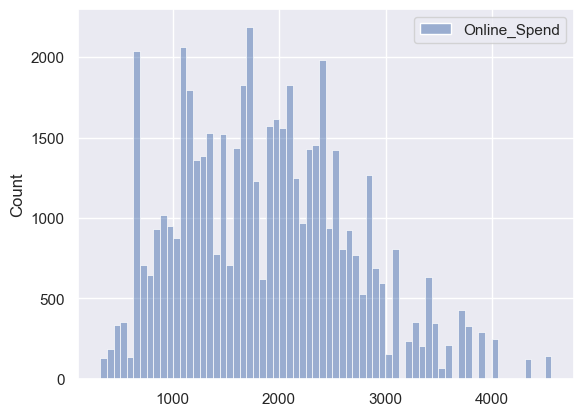

In [12]:
#f, axes = plt.subplots(3, 1, figsize=(36, 36))
sb.histplot(data = online)



<Axes: ylabel='Count'>

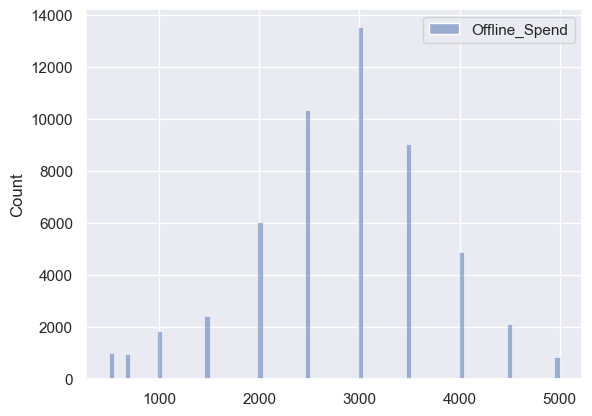

In [13]:
sb.histplot(data= offline)

In [14]:
monthly_counts=mnth.value_counts().sort_index().reset_index()
monthly_counts.columns = ['Month', 'Frequency']

<Axes: xlabel='Month', ylabel='Frequency'>

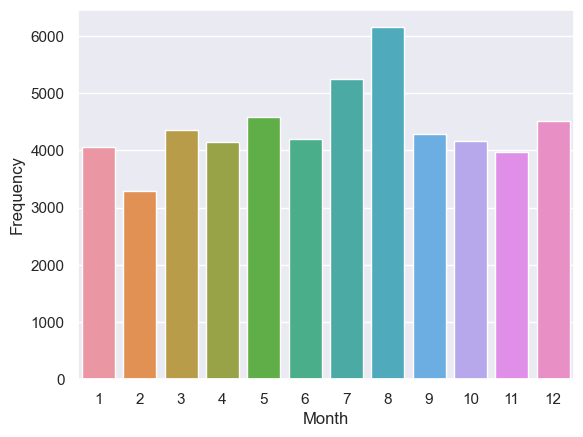

In [15]:
sb.barplot(data=monthly_counts,x="Month",y='Frequency')

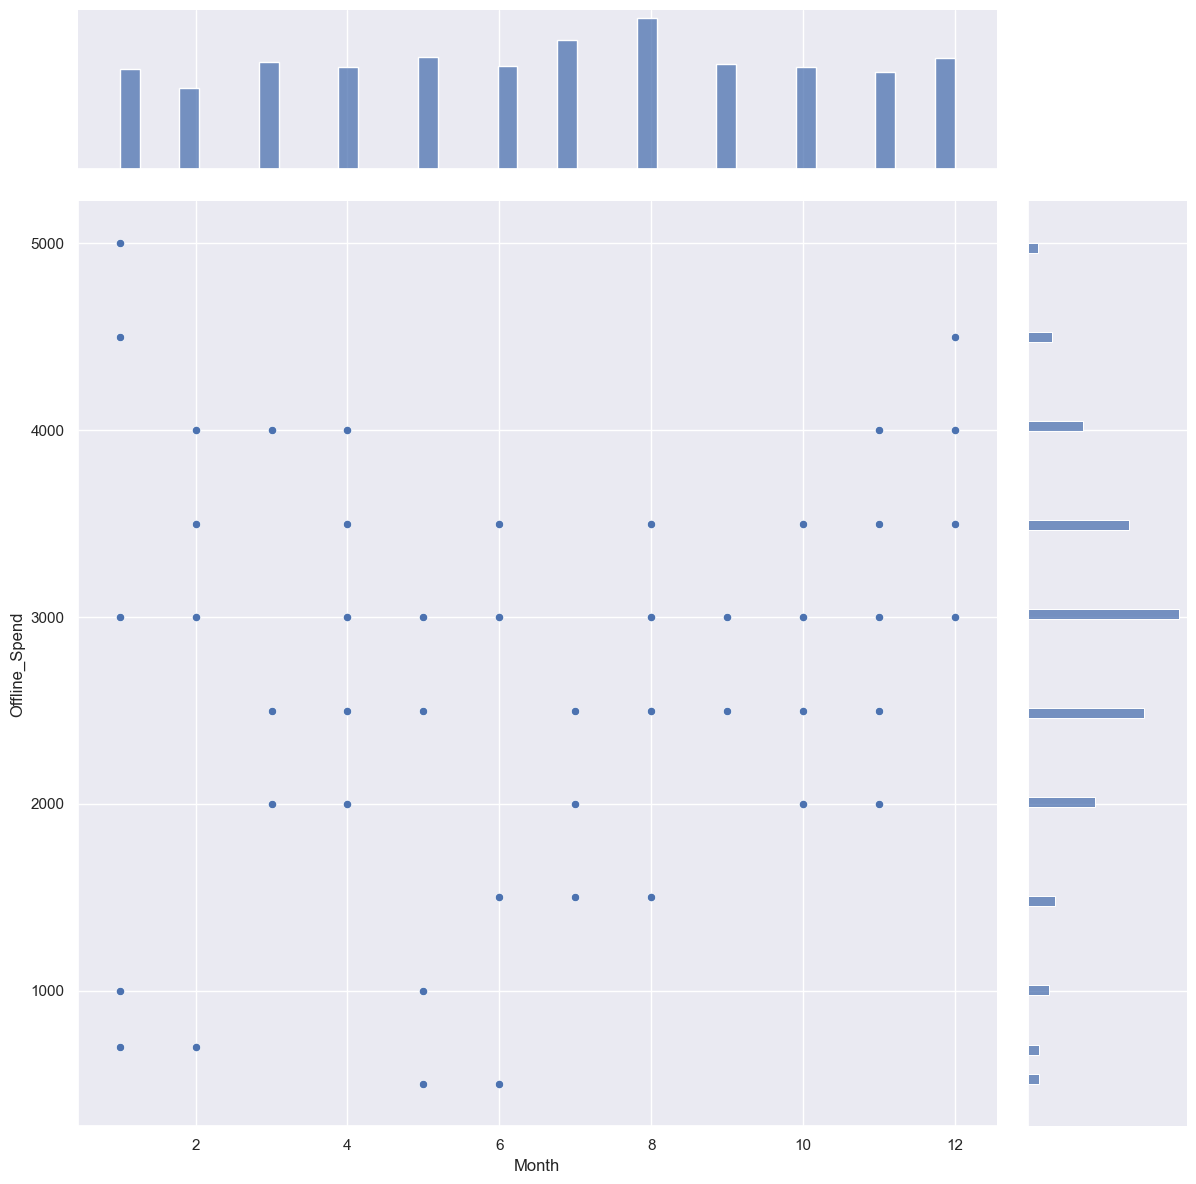

In [16]:
#leave this first testing graph
offlinemnth=pd.concat([offline, mnth], axis=1)
onlinemnth=pd.concat([online, mnth], axis=1)
sb.jointplot(data = offlinemnth, x = "Month", y = "Offline_Spend", height = 12)

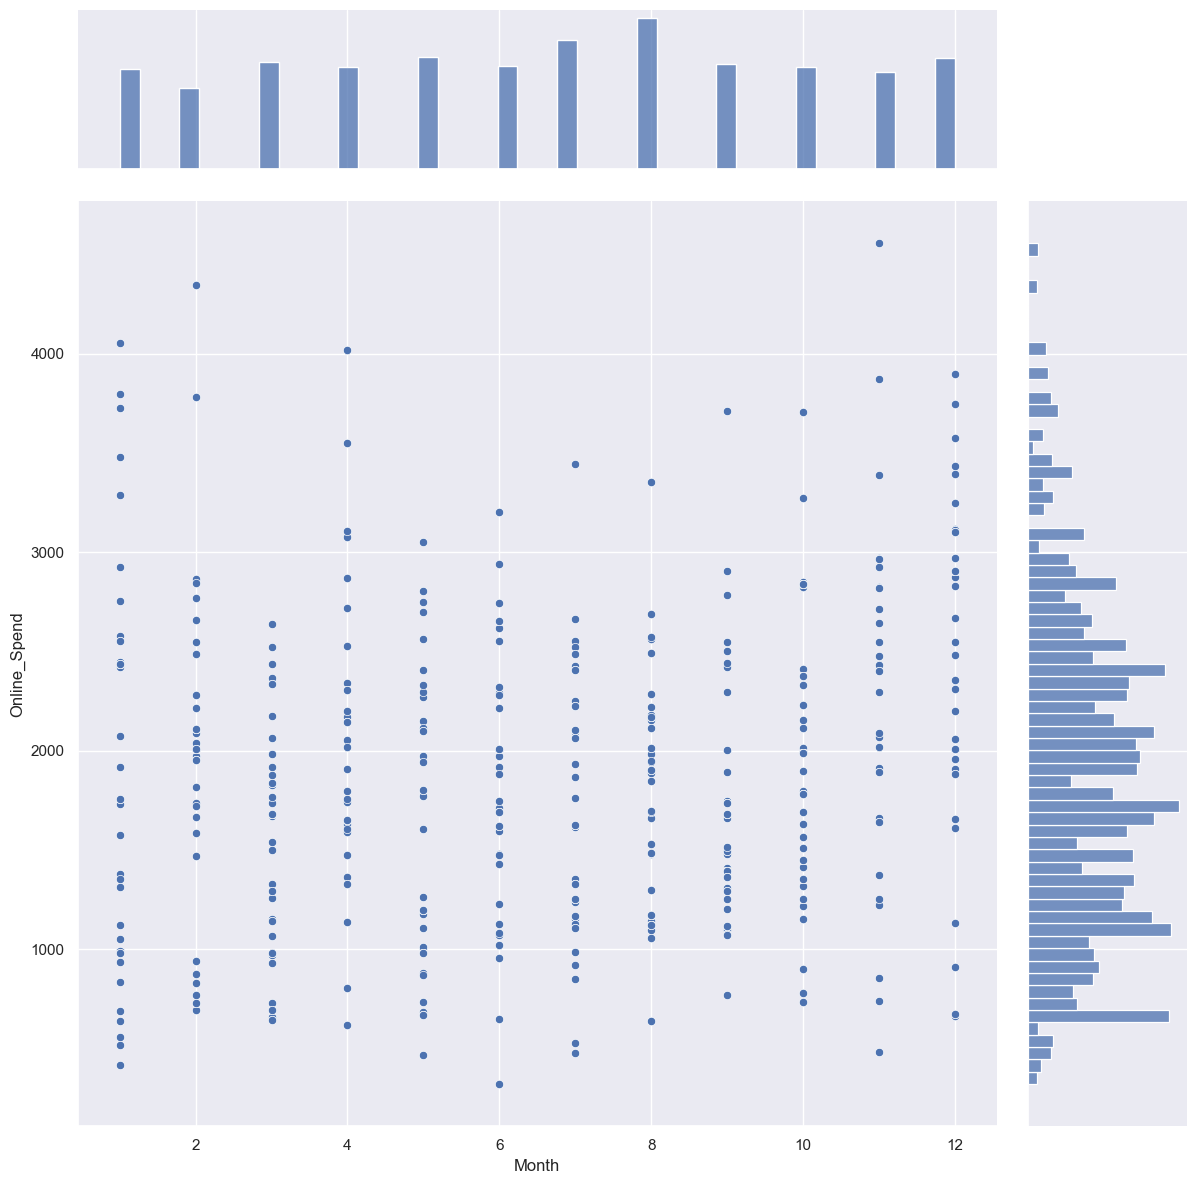

In [17]:
sb.jointplot(data = onlinemnth, x = "Month", y = "Online_Spend", height = 12)

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2205
Bags                     1882
Headgear                  771
Notebooks & Journals      750
Waze                      554
Nest-Canada               317
Bottles                   270
Accessories               235
Fun                       160
Gift Cards                160
Housewares                125
Google                    105
Backpacks                  89
Android                    47
More Bags                  46
Notebooks                  12
Name: count, dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


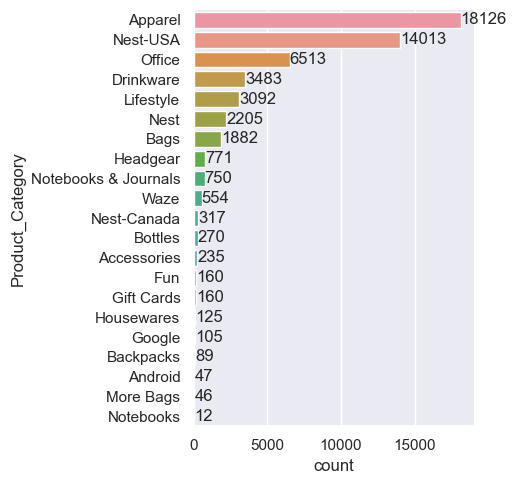

In [18]:
print(df["Product_Category"].value_counts())
g=sb.catplot(y = 'Product_Category', data = df, kind = "count",order=df['Product_Category'].value_counts().index,legend="TRUE"
        )
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])

<Axes: xlabel='Delivery_Charges', ylabel='Month'>

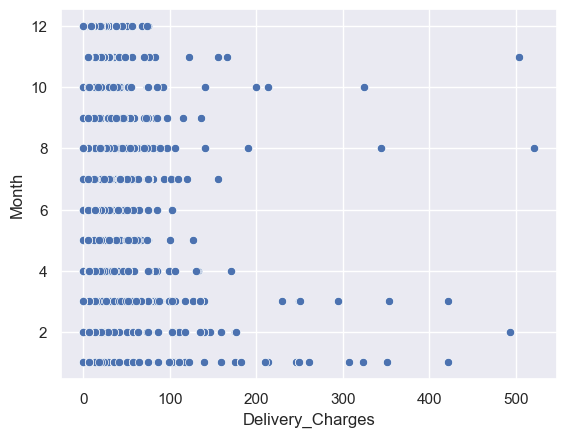

In [19]:
sb.scatterplot(data = df['Delivery_Charges'],y=df['Month'],x=df['Delivery_Charges'])

<Axes: >

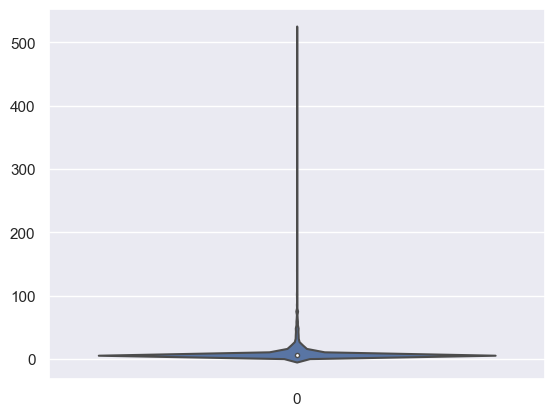

In [20]:
sb.violinplot(data = df['Delivery_Charges'])

In [30]:
datacorr=pd.DataFrame(data[["Tenure_Months","Quantity","GST","Offline_Spend","Online_Spend","Delivery_Charges","Month","Avg_Price"]])
datacorr.corr()
#Tenure_Months	Quantity	Avg_Price	Delivery_Charges	GST	Offline_Spend	Online_Spend	Month	Discount_pct

,Tenure_Months,Quantity,GST,Offline_Spend,Online_Spend,Delivery_Charges,Month,Avg_Price
Tenure_Months,1.000000,0.006867,-0.001239,0.040070,0.025865,-0.014848,0.019378,-0.000785
Quantity,0.006867,1.000000,-0.027921,-0.004768,0.010741,0.191383,-0.027278,-0.113996
GST,-0.001239,-0.027921,1.000000,-0.072826,-0.046661,0.028240,-0.093893,-0.575393
Offline_Spend,0.040070,-0.004768,-0.072826,1.000000,0.336625,-0.013329,0.200280,0.094225
Online_Spend,0.025865,0.010741,-0.046661,0.336625,1.000000,-0.019512,0.165525,0.061082
Delivery_Charges,-0.014848,0.191383,0.028240,-0.013329,-0.019512,1.000000,-0.086253,-0.107799
Month,0.019378,-0.027278,-0.093893,0.200280,0.165525,-0.086253,1.000000,0.120215
Avg_Price,-0.000785,-0.113996,-0.575393,0.094225,0.061082,-0.107799,0.120215,1.000000


<Axes: >

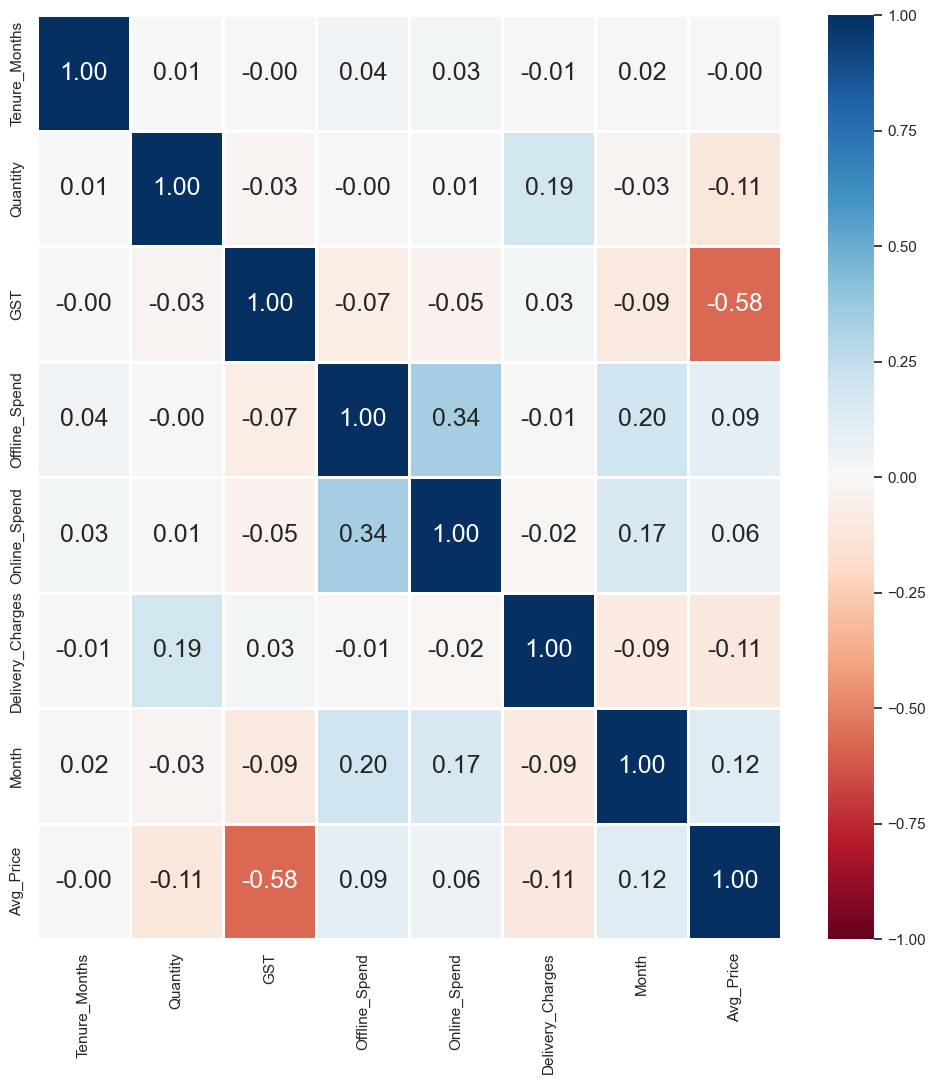

In [31]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(datacorr.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Grouping data and checking relationships with type of spendings? (This can be changed if wanna talk about something else)

## Filter based on Gender

In [26]:
gender_count = df['Gender'].value_counts() # Sum of occurrence for each unique value
gender_count

Gender
F    33007
M    19917
Name: count, dtype: int64

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


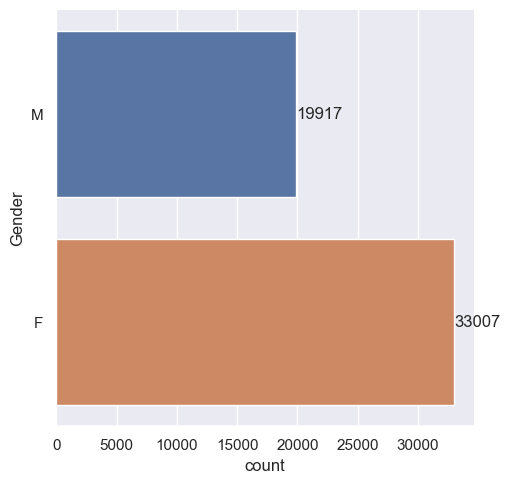

In [50]:
g=sb.catplot(y = 'Gender', data = df, kind = "count")
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])

In [31]:
# This one printing same gender
gender = pd.DataFrame(data['Gender'])
#Drop empty columns
gender = gender.dropna(axis=0)
# Replace Female with 1 and Male with 0
gender = gender.replace(['M'], '1')
gender = gender.replace(['F'], '0')
gender

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
52919,0
52920,1
52921,1
52922,1


## Calculate total number of online and offline spending for both genders

In [108]:
import matplotlib.pyplot as plt

spending_gender_df = df[['Gender','Online_Spend','Offline_Spend']]
spending_gender_df = spending_gender_df.dropna(axis=0)
online_spendings = spending_gender_df['Online_Spend'].sum()
offline_spendings = spending_gender_df['Offline_Spend'].sum()
spending_M = spending_gender_df.loc[spending_gender_df['Gender'] == 'M']
spending_F = spending_gender_df.loc[spending_gender_df['Gender'] == 'F']
online_spending_M = spending_M['Online_Spend'].sum()
online_spending_F = spending_F['Online_Spend'].sum()
offline_spending_M = spending_M['Offline_Spend'].sum()
offline_spending_F = spending_F['Offline_Spend'].sum()

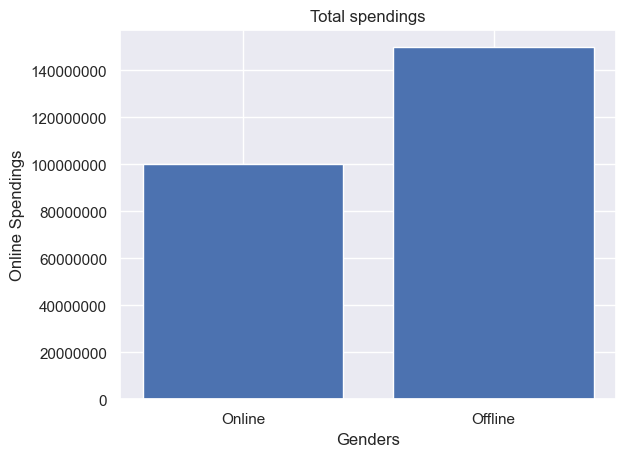

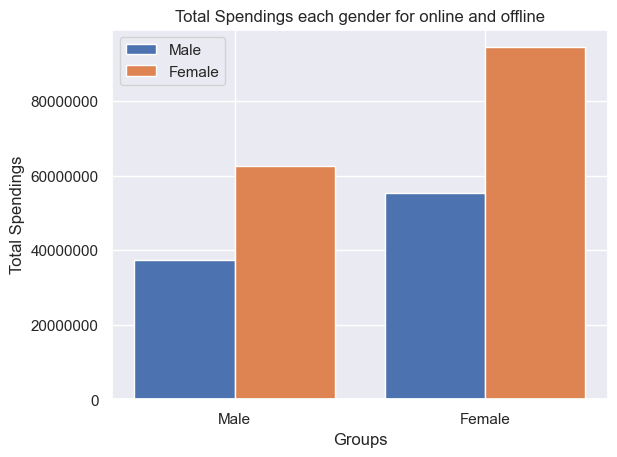

In [131]:
plt.bar(['Online', 'Offline'], [online_spendings, offline_spendings])
plt.gca().ticklabel_format(axis='y', style='plain')
plt.title('Total spendings')
plt.xlabel('Genders')
plt.ylabel('Online Spendings')
plt.show()

X = ['Male','Female'] 
male_group = [online_spending_M,offline_spending_M] 
female_group = [online_spending_F,offline_spending_F] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, male_group, 0.4, label = 'Male') 
plt.bar(X_axis + 0.2, female_group, 0.4, label = 'Female') 
  
plt.xticks(X_axis, X)
plt.xlabel("Groups") 
plt.ylabel("Total Spendings") 
plt.title("Total Spendings each gender for online and offline")
plt.gca().ticklabel_format(axis='y', style='plain')
plt.legend() 
plt.show() 

## Linear regression using random train-test split modal for both online and offline separately

In [30]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [1899.93171709]
Coefficients of Regression 	: a =  [[-15.75427924]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 8.930617990110523e-05
Mean Squared Error (MSE) 	: 652141.2598585647

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.00017570114703280293
Mean Squared Error (MSE) 	: 647369.4493155612



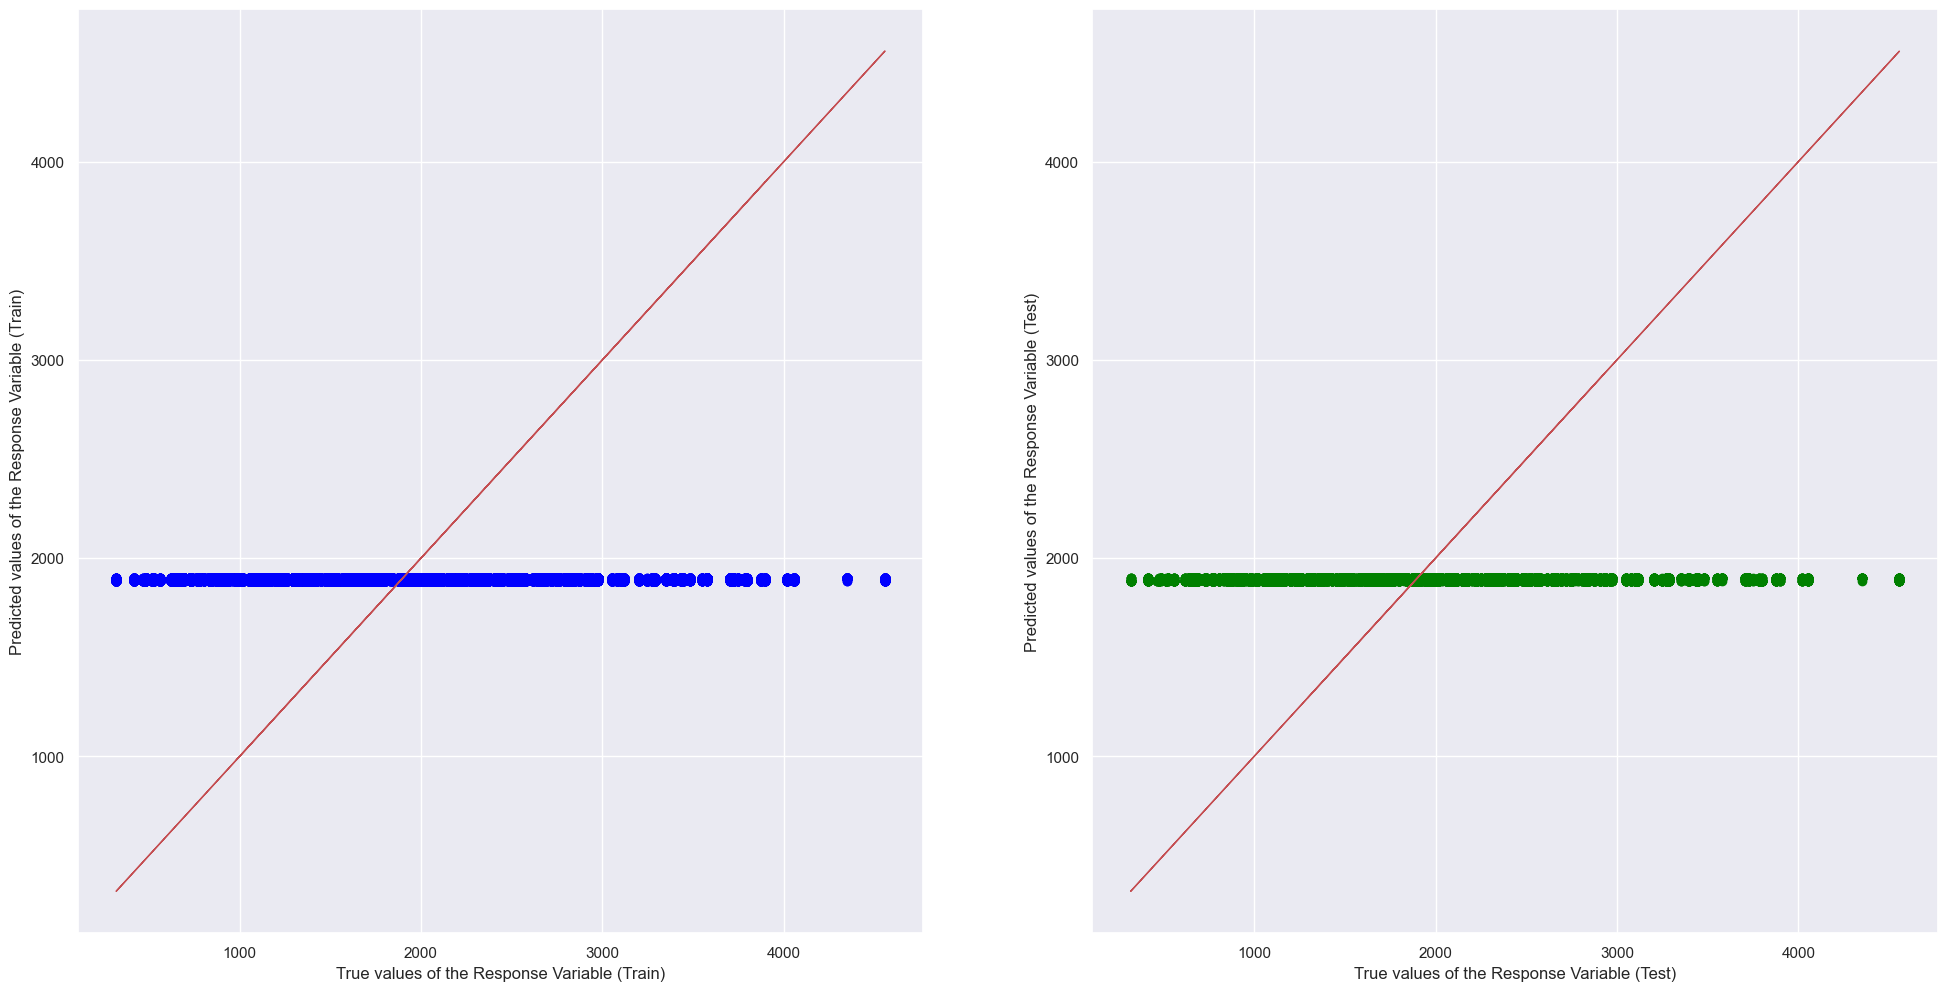

In [39]:
online = pd.DataFrame(data['Online_Spend'])

#Drop empty columns
online = online.dropna(axis=0)

Gender_train, Gender_test, Online_train, Online_test = train_test_split(gender, online, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(Gender_train, Online_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Online_train_pred = linreg.predict(Gender_train)
Online_test_pred = linreg.predict(Gender_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Gender_train, Online_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Online_train, Online_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Gender_test, Online_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Online_test, Online_test_pred))
print()

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Online_train, Online_train_pred, color = "blue")
axes[0].plot(Online_train, Online_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Online_test, Online_test_pred, color = "green")
axes[1].plot(Online_test, Online_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [1900.84315506]
Coefficients of Regression 	: a =  [[-19.41517779]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0001361896588845113
Mean Squared Error (MSE) 	: 650812.4451649006

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.540839040181652e-05
Mean Squared Error (MSE) 	: 652679.6807268247



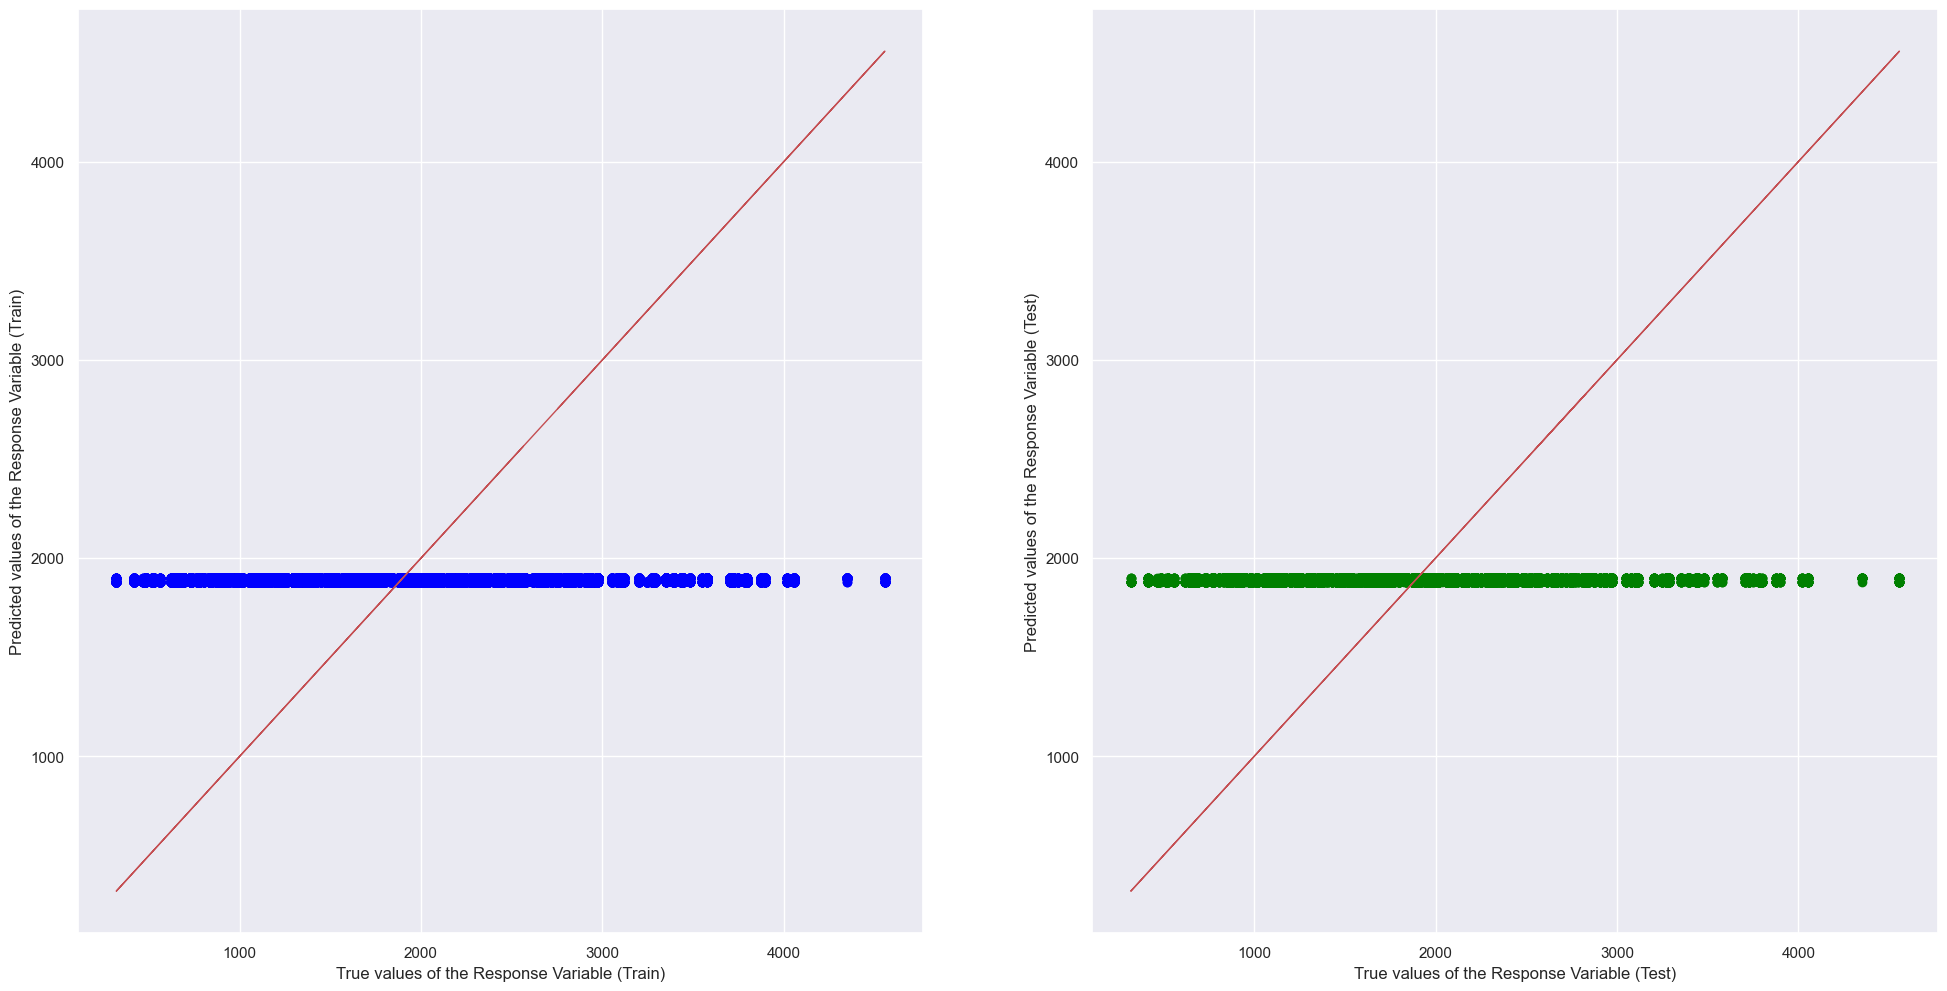

In [36]:
offline = pd.DataFrame(data['Offline_Spend'])

Gender_train, Gender_test, Offline_train, Offline_test = train_test_split(gender, online, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(Gender_train, Offline_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Offline_train_pred = linreg.predict(Gender_train)
Offline_test_pred = linreg.predict(Gender_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Gender_train, Offline_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Offline_train, Offline_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Gender_test, Offline_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Offline_test, Offline_test_pred))
print()

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Offline_train, Offline_train_pred, color = "blue")
axes[0].plot(Offline_train, Offline_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Offline_test, Offline_test_pred, color = "green")
axes[1].plot(Offline_test, Offline_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Filter based on Location

In [51]:
location = df['Location'].value_counts() # Sum of occurrence for each unique value
location=location.sort_index().reset_index()
location

,Location,count
0,California,16136
1,Chicago,18380
2,New Jersey,4503
3,New York,11173
4,Washington DC,2732


### Calculate online and offline spending for each location

## Filter based on product category

<Axes: xlabel='Location', ylabel='count'>

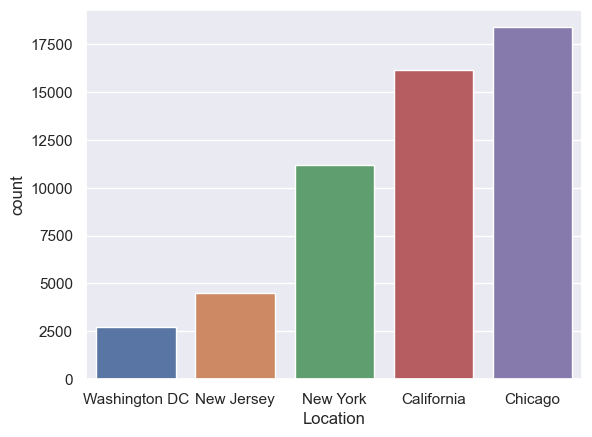

In [61]:
sb.barplot(data=location,x='Location',y='count',order=location.sort_values('count').Location)

